**EXERCISE 10**

Train deep MLP on MNIST dataset to 98% precision. Then find optimal learning rate with the goods (checkpoints, early stopping, plotting learning curves, etc.)

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import keras
import random
import pandas as pd
import os

Using TensorFlow backend.


In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train_full.shape

(60000, 28, 28)

In [4]:
x_train_full.max()

255

In [5]:
X_train, y_train = x_train_full[:50000] / 255.0, y_train_full[:50000]
X_val, y_val = x_train_full[50000:] / 255.0, y_train_full[50000:]

In [6]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(50000, 28, 28)
(10000, 28, 28)
(50000,)
(10000,)


1


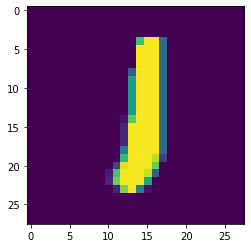

In [7]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx])
print(y_train[idx])

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_6 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2010      
Total params: 337,910
Trainable params: 337,910
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer='sgd',
             metrics=['accuracy'])

In [45]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 300us/step - loss: 0.1921 - accuracy: 0.9442 - val_loss: 0.1676 - val_accuracy: 0.9545
Epoch 2/10
50000/50000 [==============================] - 15s 308us/step - loss: 0.1625 - accuracy: 0.9527 - val_loss: 0.1490 - val_accuracy: 0.9592
Epoch 3/10
50000/50000 [==============================] - 15s 305us/step - loss: 0.1397 - accuracy: 0.9594 - val_loss: 0.1332 - val_accuracy: 0.9637
Epoch 4/10
50000/50000 [==============================] - 15s 302us/step - loss: 0.1217 - accuracy: 0.9644 - val_loss: 0.1273 - val_accuracy: 0.9646
Epoch 5/10
50000/50000 [==============================] - 15s 304us/step - loss: 0.1078 - accuracy: 0.9684 - val_loss: 0.1178 - val_accuracy: 0.9666
Epoch 6/10
50000/50000 [==============================] - 15s 304us/step - loss: 0.0957 - accuracy: 0.9724 - val_loss: 0.1084 - val_accuracy: 0.9689
Epoch 7/10
50000/50000 [==============================] 

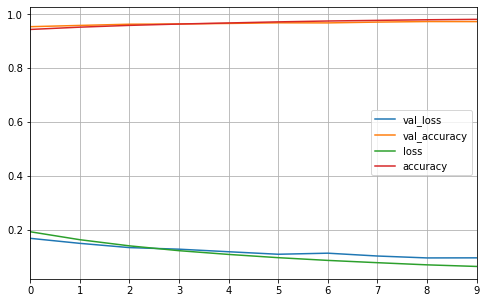

In [52]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [53]:
model.save('simple_mlp.h5')

In [8]:
# Setup logdir for TensorBoard
root_logdir = os.path.join(os.curdir, 'my_logs')

# Setup function to get directory for logging our current run
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d_%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() 

In [9]:
# Implement early stopping

# Model Checkpoint callback incase of crash
checkpoint_cb = keras.callbacks.ModelCheckpoint('simple_mlp.h5',
                                               save_best_only=True)

# Early Stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                 restore_best_weights=True)

# TensorBoard callback
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# Fit the model with callbacks
history = model.fit(X_train, y_train, epochs=20,
                 validation_data=(X_val, y_val),
                 callbacks=[checkpoint_cb, 
                           early_stopping_cb,
                           tensorboard_cb])

model = keras.models.load_model('simple_mpl.h5')

NameError: name 'model' is not defined

In [11]:
# Load TensorBoard to port 6006

%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 13744), started 0:24:54 ago. (Use '!kill 13744' to kill it.)

In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier



# Optimize!

# Create a function which can dynamically construct a model
def build_model(n_hidden=4, n_neurons=275, learning_rate=3e-3, input_shape=[28,28]):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu"))
    model.add(Dense(10, activation='softmax'))
    optimizer = SGD(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap it up
keras_clf = KerasClassifier(build_model)

In [14]:
from sklearn.model_selection import GridSearchCV

validator = GridSearchCV(keras_clf,
                         param_grid={'n_neurons': [250, 275, 300, 325, 350],
                                     'n_hidden' : [4,5, 6],
                                     # epochs is avail for tuning even when not
                                     # an argument to model building function
                                     'epochs': [25, 30]},
                         n_jobs=-1,
                         verbose=2)

# Model Checkpoint callback incase of crash
checkpoint_cb = keras.callbacks.ModelCheckpoint('simple_mlp.h5',
                                               save_best_only=True)

# Early Stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                 restore_best_weights=True)

# TensorBoard callback
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# Fit to our data
validator.fit(X_train, y_train, validation_data = (X_val, y_val),
             callbacks=[checkpoint_cb,
                       early_stopping_cb])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 28.0min finished


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 22s 438us/step - loss: 1.5127 - accuracy: 0.5896 - val_loss: 0.5557 - val_accuracy: 0.8605
Epoch 2/10
50000/50000 [==============================] - 14s 272us/step - loss: 0.4446 - accuracy: 0.8754 - val_loss: 0.3396 - val_accuracy: 0.9036
Epoch 3/10
50000/50000 [==============================] - 14s 283us/step - loss: 0.3243 - accuracy: 0.9063 - val_loss: 0.2690 - val_accuracy: 0.9240
Epoch 4/10
50000/50000 [==============================] - 15s 309us/step - loss: 0.2744 - accuracy: 0.9196 - val_loss: 0.2385 - val_accuracy: 0.9325
Epoch 5/10
50000/50000 [==============================] - 11s 230us/step - loss: 0.2408 - accuracy: 0.9287 - val_loss: 0.2168 - val_accuracy: 0.9375
Epoch 6/10
50000/50000 [==============================] - 13s 263us/step - loss: 0.2161 - accuracy: 0.9366 - val_loss: 0.1903 - val_accuracy: 0.9451
Epoch 7/10
50000/50000 [==============================] 

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001B002866948>,
             iid='deprecated', n_jobs=-1,
             param_grid={'epochs': [10], 'n_hidden': [4, 5],
                         'n_neurons': [275, 300, 325]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [15]:
validator.best_params_

{'epochs': 10, 'n_hidden': 5, 'n_neurons': 300}

In [16]:
validator.best_score_

0.9437600016593933

In [19]:
validator.score(x_test, y_test)

10000/10000 [==============================] - 2s 160us/step


0.9462000131607056

In [20]:
model = validator.best_estimator_.model